In [1]:
#2021-10-25
#Hamed Baghal Ghaffari
#These codes computes the PSWFs and their corresponding Eigenvalues.
import math

In [2]:
import numpy

In [3]:
def prolatematrix(c,m): 
    M=numpy.zeros((m,m))
    for i in range(m-2): 
        M[i,i+2]=(4*(math.pi)**2*c**2)*(i+2)*(i+1)/((2*i+3)*math.sqrt((2*i+5)*(2*i+1)))
    for i in range(m):
        M[i,i]=(i+1)*i+((4*(math.pi)**2*c**2)*(2*i**2+2*i-1))/((2*i+3)*(2*i-1))
    for i in range(m-2):
        M[i+2,i]=(4*(math.pi)**2*c**2)*(i+2)*(i+1)/((2*i+3)*math.sqrt((2*i+5)*(2*i+1)))
    return M

In [4]:
A=prolatematrix(2,5)

In [5]:
A

array([[52.63789014,  0.        , 47.08076022,  0.        ,  0.        ],
       [ 0.        , 96.74820225,  0.        , 41.3515056 ,  0.        ],
       [47.08076022,  0.        , 88.7166845 ,  0.        , 40.35493733],
       [ 0.        , 41.3515056 ,  0.        , 92.71143155,  0.        ],
       [ 0.        ,  0.        , 40.35493733,  0.        , 99.98224865]])

In [6]:
import numpy as np
import numpy.linalg as linalg
def coefficientprolate(c,m,n):
    A=prolatematrix(c,m)
    eigenValues, eigenVectors = linalg.eig(A)
    idx = eigenValues.argsort()[::+1]   
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    return eigenVectors[:,n]

In [7]:
coefficientprolate(1,20,0)

array([-8.25962692e-01,  1.22377586e-19,  5.37911167e-01, -2.38974539e-19,
       -1.65922864e-01,  4.20715667e-19,  2.99117043e-02, -6.02908724e-20,
       -3.46753370e-03,  5.76231273e-21,  2.77405070e-04, -3.91004566e-22,
       -1.61509774e-05,  1.97320780e-23,  7.12836558e-07, -7.67758192e-25,
       -2.46259666e-08,  2.37003913e-26,  6.82781943e-10, -5.93735006e-28])

In [8]:
from scipy.special import legendre
def computeprolate(x,c,m,n):
        y=0
        W=coefficientprolate(c,m,n)
        for k in range(m):
            y=y+W[k]*(math.sqrt(k+1/2))*legendre(k)(x)
        return y

In [9]:
computeprolate(.3,1,20,0)

-0.9076481468628119

In [10]:
computeprolate(.3,1,20,1)

0.9141422578469391

In [12]:
import matplotlib as plt

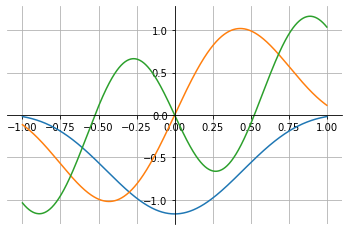

In [13]:
import matplotlib.pyplot as plt
x = numpy.linspace(-1,1,1000)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.plot(x,-computeprolate(x,1,80,0))
plt.plot(x,-computeprolate(x,1,80,1))
plt.plot(x,-computeprolate(x,1,80,3))
plt.grid()
# show the plot
plt.show()

In [14]:
def linearcombevenlegendreatzero(c,m,n):
    T=0
    W=coefficientprolate(c,m,2*n)
    for j in range(m//2 - 1):
        T=T+W[2*j]*math.sqrt(2*j+(1/2))*(((-1)**(j))*(math.factorial(2*j)))/(math.factorial(j)*math.factorial(j)*2**(2*j))
    return T

In [15]:
linearcombevenlegendreatzero(1,20,0)

-1.168121076063661

In [16]:
def linearcomboddlegendreatzero(c,m,n):
    T=0
    W=coefficientprolate(c,m,2*n+1)
    for j in range((m-1)//2):
        T=T+W[2*j+1]*math.sqrt(2*j+(3/2))*(((-1)**(j))*(math.factorial(2*j+2)))/(math.factorial(j)*math.factorial(j+1)*2**(2*j+1))
    return T

In [17]:
linearcomboddlegendreatzero(1,20,0)

3.824364607305087

In [18]:
linearcomboddlegendreatzero(1,20,1)

3.8539182384683515

In [19]:
def eveneigenvalueofprolate(c,m,n):
    W=coefficientprolate(c,m,2*n);
    y=(W[0]*math.sqrt(2))/(linearcombevenlegendreatzero(c,m,n))
    return y

In [20]:
eveneigenvalueofprolate(1,20,1)

-0.9794847448264365

In [21]:
def oddeigenvalueofprolate(c,m,n):
    W=coefficientprolate(c,m,2*n+1)
    y=(1j*W[1]*math.sqrt(2/3)*2*math.pi*c)/(linearcomboddlegendreatzero(c,m,n))
    return y

In [22]:
oddeigenvalueofprolate(1,20,1)

-0.8495596363434025j

In [23]:
def PlottingEigenvalues(c,m,n):
    T=[]
    for i in range(n):
        T.append(abs(eveneigenvalueofprolate(c,m,2*i)))
        T.append(abs(oddeigenvalueofprolate(c,m,2*i+1)))
    return T

In [24]:
PlottingEigenvalues(1,40,5)

[0.9999713762673926,
 0.8495596244771311,
 0.5240858962282898,
 0.013675836121292681,
 0.00273232874312248,
 1.0952729545629826e-05,
 1.4394698909346405e-06,
 2.059215899130224e-09,
 2.025015384268988e-10,
 1.3542372991659015e-13]

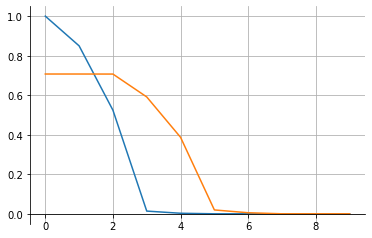

In [25]:
x = numpy.linspace(-1,1,100)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
#ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.plot(PlottingEigenvalues(1,40,5))
plt.plot(PlottingEigenvalues(2,40,5))
plt.grid()
# show the plot
plt.show()